# Определение эффективности восстановления золота из руды ⚜️

Требуется подготовить прототип модели машинного обучения для [«Zyfra»](http://zyfra.com/). Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды, это нужно для оптимизации производства, чтобы не запускать предприятие с убыточными характеристиками. 

**Цели исследования**
1. Построить ML-модели, которые смогут эффективно предсказать коэффициент восстановления золота из золотоносной руды.
2. Сформулировать объективные и понятные выводы по полученным результатам

**Ход исследования**

[Скачать тренировочный набор данных](https://code.s3.yandex.net/datasets/gold_industry_train.csv)

[Скачать тестовый набор данных](https://code.s3.yandex.net/datasets/gold_industry_test.csv)

[Скачать полный набор данных](https://code.s3.yandex.net/datasets/gold_industry_full.csv)

О качестве данных ничего не известно, поэтому требуется их предобработать.

Проанализируем данные с помощью доступных нам статистических инструментов, выявим и устраним возможные проблемы в них.

Проанализируем подробнее некоторые параметры в данных.

Обучим модели, получим значения метрик на тренировочном наборе, сравним их, отберем наилучшие модели.

Проверим модели на тестовых данных и оценим адекватность наших моделей.

Подведем итоги.

**Этапы исследования**

1. Обзор данных, разведочный анализ
2. Анализ данных
3. Обучение моделей, поиск лучших
4. Тестирование моделей, проверка их на адекватность
5. Подведение итогов

**Описание данных**
* Процесс восстановления металла из руды происходит в несколько **этапов**.
* Каждый этап также представляет из себя последовательность **подэтапов**.
* В подэтапах по отдельности фиксируются **различные параметры сырья**.

<p style='text-align: center;'>
    Иерархия названий признаков: 
    <code>[этап].[тип_параметра].[название_параметра]</code>
</p>

Возможные значения для блока `[этап]`:

* `rougher` — флотация
* `primary_cleaner` — первичная очистка
* `secondary_cleaner` — вторичная очистка
* `final` — финальные характеристики

Возможные значения для блока `[тип_параметра]`:

* `input` — параметры сырья
* `output` — параметры продукта
* `state` — параметры, характеризующие текущее состояние этапа
* `calculation` — расчётные характеристики

Названия параметров:

* `Rougher feed` — исходное сырье
* `Rougher additions (или reagent additions)` — флотационные реагенты: Xanthate, Sulphate, Depressant
      
* `Xanthate` — ксантогенат (промотер, или активатор флотации);
* `Sulphate` — сульфат (на данном производстве сульфид натрия);
* `Depressant` — депрессант (силикат натрия).
* `Rougher process (англ. «грубый процесс»)` — флотация
* `Rougher tails` — отвальные хвосты
* `Float banks` — флотационная установка
* `Cleaner process` — очистка
* `Rougher Au` — черновой концентрат золота
* `Final Au` — финальный концентрат золота

Параметры этапов:

* `air amount` — объём воздуха
* `fluid levels` — уровень жидкости
* `feed size` — размер гранул сырья
* `feed rate` — скорость подачи

<div style="border: 3px solid rgb(0,0,0); padding: 20px">
    
<center><b>Целевые признаки</b></center>
<p> </p>
<p> </p>
<p> </p>
    
<center>Эффективность обогащения чернового концентрата <code>rougher.output.recovery</code></center>

<hr></hr>

<center>Эффективность обогащения финального концентрата <code>final.output.recovery</code></center>
</div>

<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных,-их-подготовка-🤨" data-toc-modified-id="Обзор-данных,-их-подготовка-🤨-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных, их подготовка 🤨</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Получение-данных" data-toc-modified-id="Получение-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Получение данных</a></span></li><li><span><a href="#Обзор-исходных-данных" data-toc-modified-id="Обзор-исходных-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Обзор исходных данных</a></span></li><li><span><a href="#Статистические-сводки-по-тренировочному-набору-+-проверка-значений-эффективности-обогащения" data-toc-modified-id="Статистические-сводки-по-тренировочному-набору-+-проверка-значений-эффективности-обогащения-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Статистические сводки по тренировочному набору + проверка значений эффективности обогащения</a></span></li><li><span><a href="#Статистические-сводки-по-тестовому-набору" data-toc-modified-id="Статистические-сводки-по-тестовому-набору-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Статистические сводки по тестовому набору</a></span></li><li><span><a href="#Предобработка-наборов-с-данными" data-toc-modified-id="Предобработка-наборов-с-данными-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Предобработка наборов с данными</a></span><ul class="toc-item"><li><span><a href="#Пропущенные-значения" data-toc-modified-id="Пропущенные-значения-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Пропущенные значения</a></span><ul class="toc-item"><li><span><a href="#Тренировочный-набор" data-toc-modified-id="Тренировочный-набор-1.6.1.1"><span class="toc-item-num">1.6.1.1&nbsp;&nbsp;</span>Тренировочный набор</a></span></li><li><span><a href="#Тестовый-набор" data-toc-modified-id="Тестовый-набор-1.6.1.2"><span class="toc-item-num">1.6.1.2&nbsp;&nbsp;</span>Тестовый набор</a></span></li></ul></li><li><span><a href="#Необходимость-стандартизации/нормализации-значений-в-признаках" data-toc-modified-id="Необходимость-стандартизации/нормализации-значений-в-признаках-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Необходимость стандартизации/нормализации значений в признаках</a></span></li></ul></li><li><span><a href="#Итого" data-toc-modified-id="Итого-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Проанализируем-данные-🧐" data-toc-modified-id="Проанализируем-данные-🧐-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Проанализируем данные 🧐</a></span><ul class="toc-item"><li><span><a href="#Изменения-в-концентрации-металлов-(Au,-Ag,-Pb)" data-toc-modified-id="Изменения-в-концентрации-металлов-(Au,-Ag,-Pb)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменения в концентрации металлов (Au, Ag, Pb)</a></span><ul class="toc-item"><li><span><a href="#Строим-график" data-toc-modified-id="Строим-график-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Строим график</a></span></li></ul></li><li><span><a href="#Распределения-размеров-гранул-исходного-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Распределения-размеров-гранул-исходного-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения размеров гранул исходного сырья на обучающей и тестовой выборках</a></span><ul class="toc-item"><li><span><a href="#Строим-график" data-toc-modified-id="Строим-график-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Строим график</a></span></li></ul></li><li><span><a href="#Cуммарная-концентрация-металлов-(Au,-Ag,-Pb)-на-разных-стадиях" data-toc-modified-id="Cуммарная-концентрация-металлов-(Au,-Ag,-Pb)-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Cуммарная концентрация металлов (Au, Ag, Pb) на разных стадиях</a></span><ul class="toc-item"><li><span><a href="#Устранение-выбросов" data-toc-modified-id="Устранение-выбросов-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Устранение выбросов</a></span></li></ul></li><li><span><a href="#Итого" data-toc-modified-id="Итого-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Обучение-моделей,-поиск-лучших-🦾" data-toc-modified-id="Обучение-моделей,-поиск-лучших-🦾-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей, поиск лучших 🦾</a></span><ul class="toc-item"><li><span><a href="#Оцениваемые-метрики" data-toc-modified-id="Оцениваемые-метрики-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Оцениваемые метрики</a></span></li><li><span><a href="#Подготовка-данных..." data-toc-modified-id="Подготовка-данных...-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка данных...</a></span><ul class="toc-item"><li><span><a href="#Тренировочный-набор-для-целевого-признака-rougher.output.recovery" data-toc-modified-id="Тренировочный-набор-для-целевого-признака-rougher.output.recovery-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Тренировочный набор для целевого признака <code>rougher.output.recovery</code></a></span></li><li><span><a href="#Тестовый-набор-для-целевого-признака-rougher.output.recovery" data-toc-modified-id="Тестовый-набор-для-целевого-признака-rougher.output.recovery-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Тестовый набор для целевого признака <code>rougher.output.recovery</code></a></span></li><li><span><a href="#Тренировочный-набор-для-целевого-признака-final.output.recovery" data-toc-modified-id="Тренировочный-набор-для-целевого-признака-final.output.recovery-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Тренировочный набор для целевого признака <code>final.output.recovery</code></a></span></li><li><span><a href="#Тестовый-набор-для-целевого-признака-final.output.recovery" data-toc-modified-id="Тестовый-набор-для-целевого-признака-final.output.recovery-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Тестовый набор для целевого признака <code>final.output.recovery</code></a></span></li></ul></li><li><span><a href="#Процесс-обучения-моделей:-стандартизация-данных,-подбор-гиперпараметров,-отбор-лучших" data-toc-modified-id="Процесс-обучения-моделей:-стандартизация-данных,-подбор-гиперпараметров,-отбор-лучших-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Процесс обучения моделей: стандартизация данных, подбор гиперпараметров, отбор лучших</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия-📈" data-toc-modified-id="Линейная-регрессия-📈-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Линейная регрессия 📈</a></span><ul class="toc-item"><li><span><a href="#rougher.output.recovery" data-toc-modified-id="rougher.output.recovery-3.3.1.1"><span class="toc-item-num">3.3.1.1&nbsp;&nbsp;</span><code>rougher.output.recovery</code></a></span></li><li><span><a href="#final.output.recovery" data-toc-modified-id="final.output.recovery-3.3.1.2"><span class="toc-item-num">3.3.1.2&nbsp;&nbsp;</span><code>final.output.recovery</code></a></span></li></ul></li><li><span><a href="#Случайный-лес-🌳" data-toc-modified-id="Случайный-лес-🌳-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Случайный лес 🌳</a></span><ul class="toc-item"><li><span><a href="#rougher.output.recovery" data-toc-modified-id="rougher.output.recovery-3.3.2.1"><span class="toc-item-num">3.3.2.1&nbsp;&nbsp;</span><code>rougher.output.recovery</code></a></span></li><li><span><a href="#final.output.recovery" data-toc-modified-id="final.output.recovery-3.3.2.2"><span class="toc-item-num">3.3.2.2&nbsp;&nbsp;</span><code>final.output.recovery</code></a></span></li></ul></li></ul></li><li><span><a href="#Сравнение-результатов" data-toc-modified-id="Сравнение-результатов-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Сравнение результатов</a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Тестирование-моделей-🔥" data-toc-modified-id="Тестирование-моделей-🔥-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование моделей 🔥</a></span><ul class="toc-item"><li><span><a href="#rougher.output.recovery" data-toc-modified-id="rougher.output.recovery-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><code>rougher.output.recovery</code></a></span></li><li><span><a href="#final.output.recovery" data-toc-modified-id="final.output.recovery-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><code>final.output.recovery</code></a></span></li><li><span><a href="#Final-sMAPE" data-toc-modified-id="Final-sMAPE-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span><code>Final sMAPE</code></a></span></li><li><span><a href="#Проверка-моделей-на-адекватность" data-toc-modified-id="Проверка-моделей-на-адекватность-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Проверка моделей на адекватность</a></span><ul class="toc-item"><li><span><a href="#DummyRegressor" data-toc-modified-id="DummyRegressor-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span><code>DummyRegressor</code></a></span><ul class="toc-item"><li><span><a href="#rougher.output.recovery" data-toc-modified-id="rougher.output.recovery-4.4.1.1"><span class="toc-item-num">4.4.1.1&nbsp;&nbsp;</span><code>rougher.output.recovery</code></a></span></li><li><span><a href="#final.output.recovery" data-toc-modified-id="final.output.recovery-4.4.1.2"><span class="toc-item-num">4.4.1.2&nbsp;&nbsp;</span><code>final.output.recovery</code></a></span></li><li><span><a href="#Final-sMAPE" data-toc-modified-id="Final-sMAPE-4.4.1.3"><span class="toc-item-num">4.4.1.3&nbsp;&nbsp;</span><code>Final sMAPE</code></a></span></li></ul></li></ul></li><li><span><a href="#Итого" data-toc-modified-id="Итого-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Общий-вывод-👀" data-toc-modified-id="Общий-вывод-👀-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод 👀</a></span><ul class="toc-item"><li><span><a href="#Краткая-сводка-по-выполненным-задачам" data-toc-modified-id="Краткая-сводка-по-выполненным-задачам-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Краткая сводка по выполненным задачам</a></span><ul class="toc-item"><li><span><a href="#Шаг-1.-Обзор-данных." data-toc-modified-id="Шаг-1.-Обзор-данных.-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Шаг 1. Обзор данных.</a></span></li><li><span><a href="#Шаг-2.-Анализ-данных" data-toc-modified-id="Шаг-2.-Анализ-данных-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Шаг 2. Анализ данных</a></span></li><li><span><a href="#Шаг-3.-Обучение-моделей,-поиск-лучших-из-них" data-toc-modified-id="Шаг-3.-Обучение-моделей,-поиск-лучших-из-них-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Шаг 3. Обучение моделей, поиск лучших из них</a></span></li><li><span><a href="#Шаг-4.-Тестирование-моделей" data-toc-modified-id="Шаг-4.-Тестирование-моделей-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Шаг 4. Тестирование моделей</a></span></li></ul></li><li><span><a href="#Что-могло-привести-к-получению-неполноценных-результатов?" data-toc-modified-id="Что-могло-привести-к-получению-неполноценных-результатов?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Что могло привести к получению неполноценных результатов?</a></span></li></ul></li></ul></div>

## Обзор данных, их подготовка 🤨

### Импорт библиотек

In [1]:
from typing import NoReturn, Dict, Tuple  # Аннотирование
import urllib  # Обработка ошибок при получении исходных данных
from IPython.display import display, HTML  # Отображение данных
from time import time # Время выполнения
import warnings  # Предупреждения

from sklearn.model_selection import GridSearchCV, KFold  # Подбор гиперпараметров
from sklearn.preprocessing import RobustScaler  # Алгоритм стандартизации данных
from sklearn.metrics import mean_absolute_error, make_scorer  # Метрики
from sklearn.dummy import DummyRegressor  # Константная модель
from sklearn.ensemble import RandomForestRegressor  # Регрессионная модель №1
from sklearn.linear_model import LinearRegression  # Регрессионная модель №2

import scipy.stats as st  # Статистические инструменты

import seaborn as sns  # Построение графиков
import matplotlib.pyplot as plt  # Построение графиков
import numpy as np  # Работа с массивами
import pandas as pd  # Работа с наборами данных


pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 200)

STATE = np.random.RandomState(42)

%matplotlib inline

warnings.filterwarnings('ignore')  # Убираем показ предупреждений

### Получение данных

Получим данные, обработаем потенциальные ошибки

In [2]:
labels = ['gold_industry_train.csv',
          'gold_industry_test.csv', 
          'gold_industry_full.csv']

datasets = []

try:
    for i, label in enumerate(labels):
        try:
            datasets.append(pd.read_csv(
                f'https://code.s3.yandex.net/datasets/{label}', 
                index_col=0, parse_dates=['date']))
            print(f'✅ Датасет №{i+1} успешно прочитан c внешнего ресурса')
            display(datasets[i].head(10))
        except urllib.request.URLError:
            raise Exception(
                f'❌ Ошибка получения датасета №{i+1} с внешнего ресурса')


except:
    data_count = int(input(
        'Укажите кол-во датасетов для загрузки с локального хранилища (прим. \'3\'):\n'))
    for i in range(data_count):
        data_name = input(
            f'Укажите имя файла №{i+1} с данными в каталоге с проектом. Например: "data.csv".\n'
            f'Если данные находятся не в каталоге с проектом нажмите Enter.\n\n')

        if not data_name:
            while True:
                data_path = input('Введите абсолютный путь к датасету:\n')
                try:
                    datasets.append(pd.read_csv(data_path, 
                                                index_col=0, parse_dates=['date']))
                    print(
                        f'✅ Датасет №{i+1} успешно прочитан по указанному пути')
                    display(datasets[i].head(10))
                    break

                except FileNotFoundError:
                    raise Exception(
                        f'❌Указан неверный путь к файлу: {data_path}')
        else:
            try:
                datasets.append(pd.read_csv(data_name, 
                                            index_col=0, parse_dates=['date']))
                print(
                    f'✅ Датасет №{i+1} успешно прочитан из каталога с проектом')
                display(datasets[i].head(10))
            except FileNotFoundError:
                raise Exception(f'❌Указан не существующий файл: {data_name}')

train, test, full_data = datasets

for dataset, label in zip(datasets, labels):
    dataset.columns.name = label

✅ Датасет №1 успешно прочитан c внешнего ресурса


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57

✅ Датасет №2 успешно прочитан c внешнего ресурса


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,1648.953828,-400.468641,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,1052.601592,-499.695075,955.171539,-500.294989,851.957342,-499.779541,850.765662,-501.030559,6.929364,8.920717,108.080163,7.970121,6.660000,0.774909,1652.660845,-399

✅ Датасет №3 успешно прочитан c внешнего ресурса


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57

### Обзор исходных данных

Требуется проверить наличие и устранить:
- Пропущенные значения в признаках
- Дубликаты

Требуется выяснить:
- Какие признаки недоступны в тестовом наборе из-за особенностей технологического процесса.
- Чем лучше заполнять пропуски, если они есть

Для оптимизации кода воспользуемся функциями.

Дополнительно в этом же этапе оценим **правильность рассчетов значений эффективности обогащения**, так как неверные значения могут нежелательно повлиять на адекватность моделей в дальнейшем. 

Формула рассчета этого параметра следующая:  $$Recovery = \frac{C\cdot(F-T)}{F\cdot(C-T)} \cdot 100\%$$

Правильные рассчеты в данных подтверждаются значением метрики `MAE` очень близкой к нулю.

In [3]:
def na_info(data: pd.DataFrame) -> pd.Series:
    '''
    Возвращает pd.Series с информацией о количестве пропусков в столбцах pd.DataFrame.
    
            Параметры:
                    data (pd.DataFrame) : данные
            
            Возвращает:
                    na_info (pd.Series) : стат сводка по пропускам
    '''
    
    na_information = {}
    
    for feature in data.columns:
        missings = data[feature].isna().sum()
        if missings:
            na_information[feature] = missings
    try:
        label = data.columns.name
    except:
        label = data.name
        
    na_information = pd.Series(na_information, name=f'{label}. Сводка о количестве пропусков')
    
    return na_information

In [4]:
def dtypes_info(data: pd.DataFrame) -> pd.Series:
    '''
    Возвращает pd.Series с информацией о типе признаков в pd.DataFrame.
    
            Параметры:
                    data (pd.DataFrame) : данные
            
            Возвращает:
                    dtypes_info (pd.Series) : стат сводка по типам данных
    '''
    
    dtypes_information = {}
    
    dtypes_distribution = {
        'Числовые признаки' : 0,
        'Категориальные признаки' : 0
    }
    
    for feature in data.columns:
        feature_dtype = data[feature].dtype
        if feature_dtype is np.dtype(np.float64) or feature_dtype is np.dtype(np.int64):
            dtypes_information[feature] = 'Числовой признак'
            dtypes_distribution['Числовые признаки'] += 1
        else:
            dtypes_information[feature] = 'Категориальный признак'
            dtypes_distribution['Категориальные признаки'] += 1
    
    dtypes_information.update(dtypes_distribution) # Добавляем в конец сводки количество 
                                                   # каждого из типов признаков
    
    try:
        label = data.columns.name
    except:
        label = data.name
    
    dtypes_information = pd.Series(
        dtypes_information, name=f'{label}. Сводка о типе признаков')
    
    return dtypes_information

In [5]:
def eda_analysis(data: pd.DataFrame, recovery_value_check: bool = False) -> NoReturn:
    '''
    Возвращает pd.Series с информацией о типе признаков в pd.DataFrame.

            Параметры:
                    data (pd.DataFrame) : данные
                    recovery_value_check (bool) по умолч. 'False' : проверить правильность рассчетов значений признака rougher.output.recovery по метрике MAE
    '''
    display_info = []

    # Информация о пропусках
    na_information = na_info(data)
    display_info.append(na_information)

    # Информация о типе признаков
    dtypes_information = dtypes_info(data)
    display_info.append(dtypes_information)
    
    # Информация о дубликатах
    doubles_information = data.duplicated().sum()

    if recovery_value_check:  # Проверка правильности рассчетов значений эффективности обогащения
        recovery_wo_missings = data[data['rougher.output.recovery'].notna()]
        
        # Доля золота в концентрате после флотации/очистки
        C = recovery_wo_missings['rougher.output.concentrate_au']
        
        # Доля золота в сырье/концентрате до флотации/очистки
        F = recovery_wo_missings['rougher.input.feed_au']
        
        # Доля золота в отвальных хвостах после флотации/очистки
        T = recovery_wo_missings['rougher.output.tail_au']

        current_values = recovery_wo_missings['rougher.output.recovery']

        recovery_mae = mean_absolute_error(
            (C * (F - T) / (F * (C - T)) * 100), current_values)

    # Отображение результатов   
    for information in display_info:
        try:
            label = information.columns.name
        except:
            label = information.name
        print(f'\t\t\t\tℹ️ {label}')
        display(HTML(
            information.to_frame().to_html()))
        
    print(
        f'\n\nДубликаты:\t{doubles_information}')
    
    if recovery_value_check:
        print(
            f'\n\nЗначение MAE для эффективности обогащения:\t{recovery_mae}')

### Статистические сводки по тренировочному набору + проверка значений эффективности обогащения

In [6]:
eda_analysis(train, recovery_value_check=True)

				ℹ️ gold_industry_train.csv. Сводка о количестве пропусков


,gold_industry_train.csv. Сводка о количестве пропусков
rougher.input.feed_pb,72
rougher.input.feed_sol,77
rougher.input.feed_rate,7
rougher.input.feed_size,101
rougher.input.floatbank10_sulfate,31
rougher.input.floatbank10_xanthate,7
rougher.state.floatbank10_e_air,429
rougher.input.floatbank11_sulfate,36
rougher.input.floatbank11_xanthate,407
rougher.calculation.sulfate_to_au_concentrate,1


				ℹ️ gold_industry_train.csv. Сводка о типе признаков


,gold_industry_train.csv. Сводка о типе признаков
rougher.input.feed_au,Числовой признак
rougher.input.feed_ag,Числовой признак
rougher.input.feed_pb,Числовой признак
rougher.input.feed_sol,Числовой признак
rougher.input.feed_rate,Числовой признак
rougher.input.feed_size,Числовой признак
rougher.input.floatbank10_sulfate,Числовой признак
rougher.input.floatbank10_xanthate,Числовой признак
rougher.state.floatbank10_a_air,Числовой признак
rougher.state.floatbank10_a_level,Числовой признак




Дубликаты:	0


Значение MAE для эффективности обогащения:	9.83758577644259e-15


**В тренировочном наборе:**
- Присутствуют пропуски: будем разбираться с ними далее.
- Проблем с типами данных нет, все признаки числовые
- Явных дубликатов нет

Эффеффективность обогащения после флотации (признак `rougher.output.recovery`) **рассчитна верно**. Об этом можно говорить, **так как значений метрики `MAE` около нулевое**.
 
Немного про сами признаки. Теперь их все хорошо видно, поэтому **чуть подробнее про каждый**.

Они явно разделены по производственным этапам:
- ```rougher.input``` - параметры сырья для флотации:
    - *feed_au/feed_ag/feed_pb/feed_sol* - содержание золота/серебра/свинца/растворённых веществ в золотосодержащей руде до обработки
    - *feed_rate* - скорость подачи золотосодержащей руды на обработку 
    - *feed_size* - размер золотосодержащей руды перед обработкой
- ```rougher.state``` - параметры сырья на разных этапах обработки: 
    - *floatbank-air* - содержание воздуха на одной их флотационных стадий 
    - *floatbank-level* - уровень жидкости на этой же стадии
- ```rougher.calculation``` - расчётные характеристики после флотации, такие как:
    - *sulfate_to_au_concentrate* - отношение содержания сульфатов к содержанию золота в концентрате после флотации
    - *floatbank_sulfate_to_au_feed* - отношение содержания сульфатов к содержанию золота в питательной руде в конкретном флотационном банке
    - *au_pb_ratio* - отношение содержания золота к содержанию свинца после флотации
- ```rougher.output``` - параметры продукта после флотации:
    - *concentrate au/ag/pb/sol* - концентрации золота/серебра/свинца/мелкодисперстных частиц твердого вещества (золи)
    - *recovery* - процентное соотношение между фактическим и теоретическим извлечением золота
    - *tail au/ag/pb/sol* - оставшиеся концентрации веществ в отвальных хвостах
- ```primary_cleaner.input``` - характеристики руды перед первичной очисткой:
    - *sulfate* - количество сульфата, добавляемого в этап очистки. Сульфат уменьшает поверхностное натяжение между рудой и воздушными пузырьками, что способствует лучшему отделению ценных металлов
    - *depressant* - сульфид натрия, добавляемый в этап очистки для подавления нежелательных минералов. Чаще всего это делается во избежание образования серной кислоты при контакте руды с водой и воздухом
    - *feed_size* - размер частиц руды, подаваемых на этап очистки
    - *xanthate* - ксантогенат для улучшения флотации. Он образует гидрофобную поверхность на частицах руды, что способствует их отделению от воды и образованию пузырьков воздуха. Добавление ксантогената позволяет извлекать ценные металлы из руды более эффективно
- ```primary_cleaner.output``` - характеристики руды после первичной очистки
- ```secondary_cleaner.state``` - характеристики руды перед вторичной очисткой
- ```secondary_cleaner.output``` - характеристики руды после вторичной очистки
- ```final.output``` - финальные характеристики концентрата и отвальных хвостов:
    - *concentrate au/ag/pb/sol* - концентрации золота/серебра/свинца/мелкодисперстных частиц в финальном концентрате
    - *tail au/ag/pb/sol* - концентрации золота/серебра/свинца/мелкодисперстных частиц в отвальных хвостах
    - *recovery* - процентное соотношение между фактическим и теоретическим извлечением золота из руды после всех этапов обработки

### Статистические сводки по тестовому набору

In [7]:
eda_analysis(test)

				ℹ️ gold_industry_test.csv. Сводка о количестве пропусков


,gold_industry_test.csv. Сводка о количестве пропусков
rougher.input.feed_pb,28
rougher.input.feed_sol,22
rougher.input.feed_rate,4
rougher.input.feed_size,44
rougher.input.floatbank10_sulfate,3
rougher.input.floatbank10_xanthate,1
rougher.state.floatbank10_a_air,1
rougher.state.floatbank10_a_level,1
rougher.state.floatbank10_b_air,1
rougher.state.floatbank10_b_level,1


				ℹ️ gold_industry_test.csv. Сводка о типе признаков


,gold_industry_test.csv. Сводка о типе признаков
rougher.input.feed_au,Числовой признак
rougher.input.feed_ag,Числовой признак
rougher.input.feed_pb,Числовой признак
rougher.input.feed_sol,Числовой признак
rougher.input.feed_rate,Числовой признак
rougher.input.feed_size,Числовой признак
rougher.input.floatbank10_sulfate,Числовой признак
rougher.input.floatbank10_xanthate,Числовой признак
rougher.state.floatbank10_a_air,Числовой признак
rougher.state.floatbank10_a_level,Числовой признак




Дубликаты:	0


**В тестовом наборе:**
- Также присутствуют пропуски - будем разбираться
- Количество признаков меньше, чем в тренировочном наборе. Нет целевых признаков (признаки `rougher.output.recovery` и `final.output.recovery`). Согласно документации, которая прилагалась к данным, это связано с тем, что некоторые параметры вычисляются в процессе обработки руды и не доступны на начальных этапах каждого шага. Требуется скорректировать набор признаков в тестовом наборе.
- Явных дубликатов нет

---

Значения в обоих наборах требуется **стандартизировать или нормализовать**. Зависеть это будет от того, как распределены значения в признаках. Проверим этот факт далее.

### Предобработка наборов с данными

#### Пропущенные значения

Пропуски есть как и в тренировочном наборе, так и в тестовом.

> В обучающей выборке логичную замену подобрать не трудно, так как технологический процесс линейный, а записи в данных отсортированы по времени, то заполнить пропуски "соседями" - довольно неплохая идея.

> В тесте заполнение пропусков нереальными данными может не очень хорошо повлиять на результаты проверки модели, поэтому целесообразно проверить, есть ли в полном наборе с данными замена пропущенным значениям. Если нет, то оценим количество записей, которые придется удалить и после примем решение.

##### Тренировочный набор

Дабы не усложнять логику заполнения пропусков предложенным способом, воспользуемся функцией `fillna()` c параметрами `method` и `limit`.

In [8]:
def filling_na(data: pd.DataFrame) -> pd.DataFrame:
    while data.isna().sum().sum():
        data = data.fillna(method='ffill', limit=3)
    return data

In [9]:
train = filling_na(train)

na_info(train)

Series([], Name: gold_industry_train.csv. Сводка о количестве пропусков, dtype: float64)

Series пустой, значит пропусков не осталось👍🏻

##### Тестовый набор

Сопоставим пропущенные ячейки в тестовом наборе с полным набором данных (лежат в `full_data`).

In [10]:
print(f'Суммарно ячеек с пропусками до: {test.isna().sum().sum()}')

test_filled = test.fillna(full_data)

print(f'Суммарно ячеек с пропусками после: {test_filled.isna().sum().sum()}')

Суммарно ячеек с пропусками до: 375
Суммарно ячеек с пропусками после: 375


Довольно неплохой результат. Оставшиеся две строки просто удалим.

In [11]:
test = test_filled.drop(index=test_filled[test_filled.isna().any(axis=1)].index)
na_info(test)

Series([], Name: gold_industry_test.csv. Сводка о количестве пропусков, dtype: float64)

Порядок👍🏻

#### Необходимость стандартизации/нормализации значений в признаках

Выбор метода зависит от распределения значений. Проверим их

<AxesSubplot:ylabel='Density'>

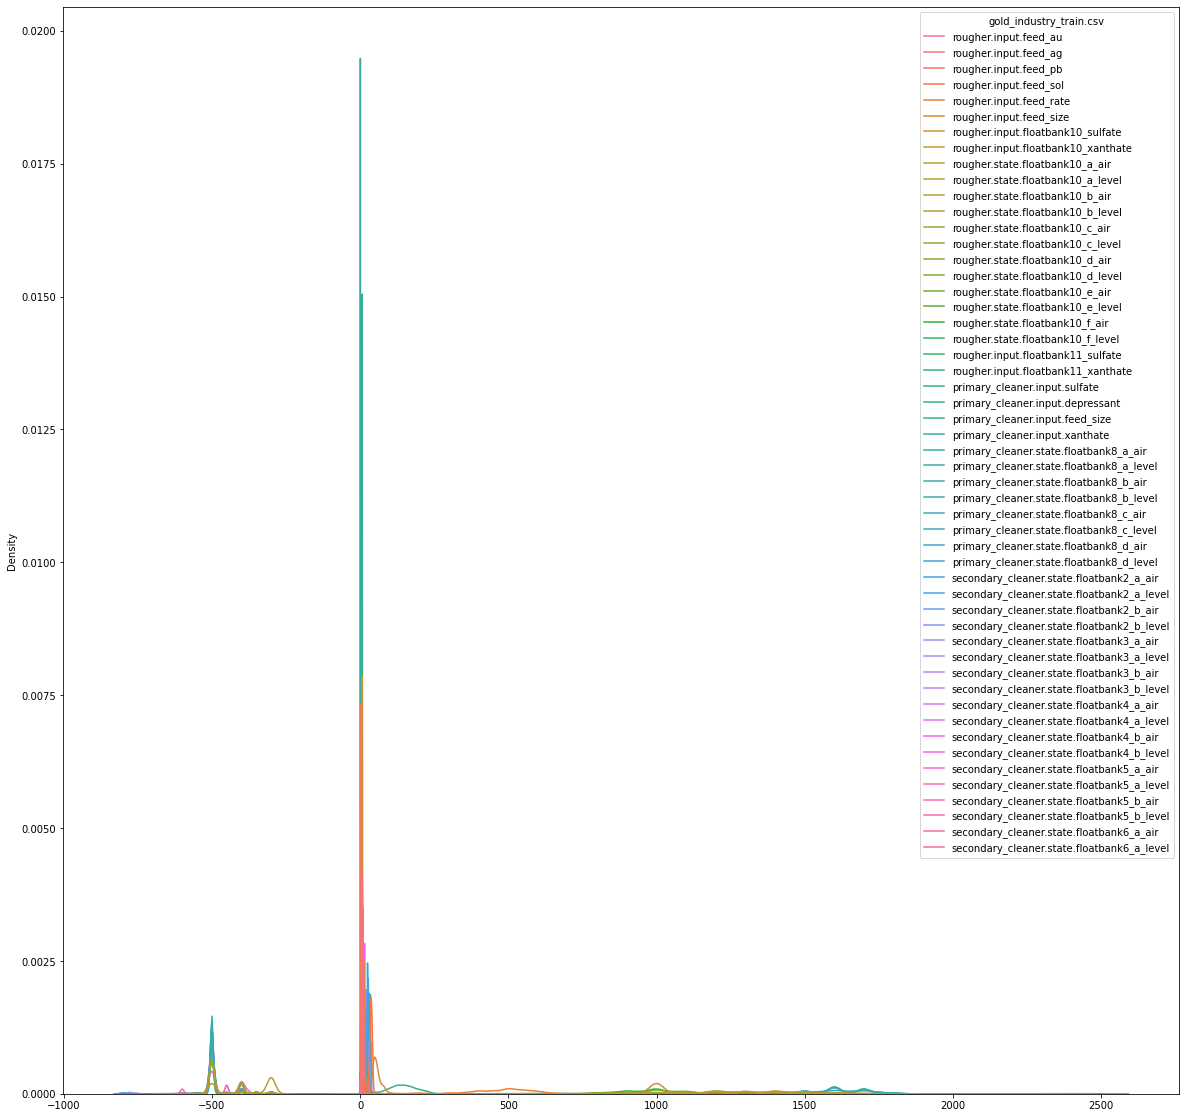

In [12]:
plt.figure(figsize=(20, 20))
sns.kdeplot(data=train[test.columns])

Большая часть значений имеет нормальное распределение &#8658; можем применять стандартизацию.

Для выбора наиболее оптимального алгоритма стандартизации оценим кол-во выбросов в признаках.

<AxesSubplot:xlabel='gold_industry_train.csv'>

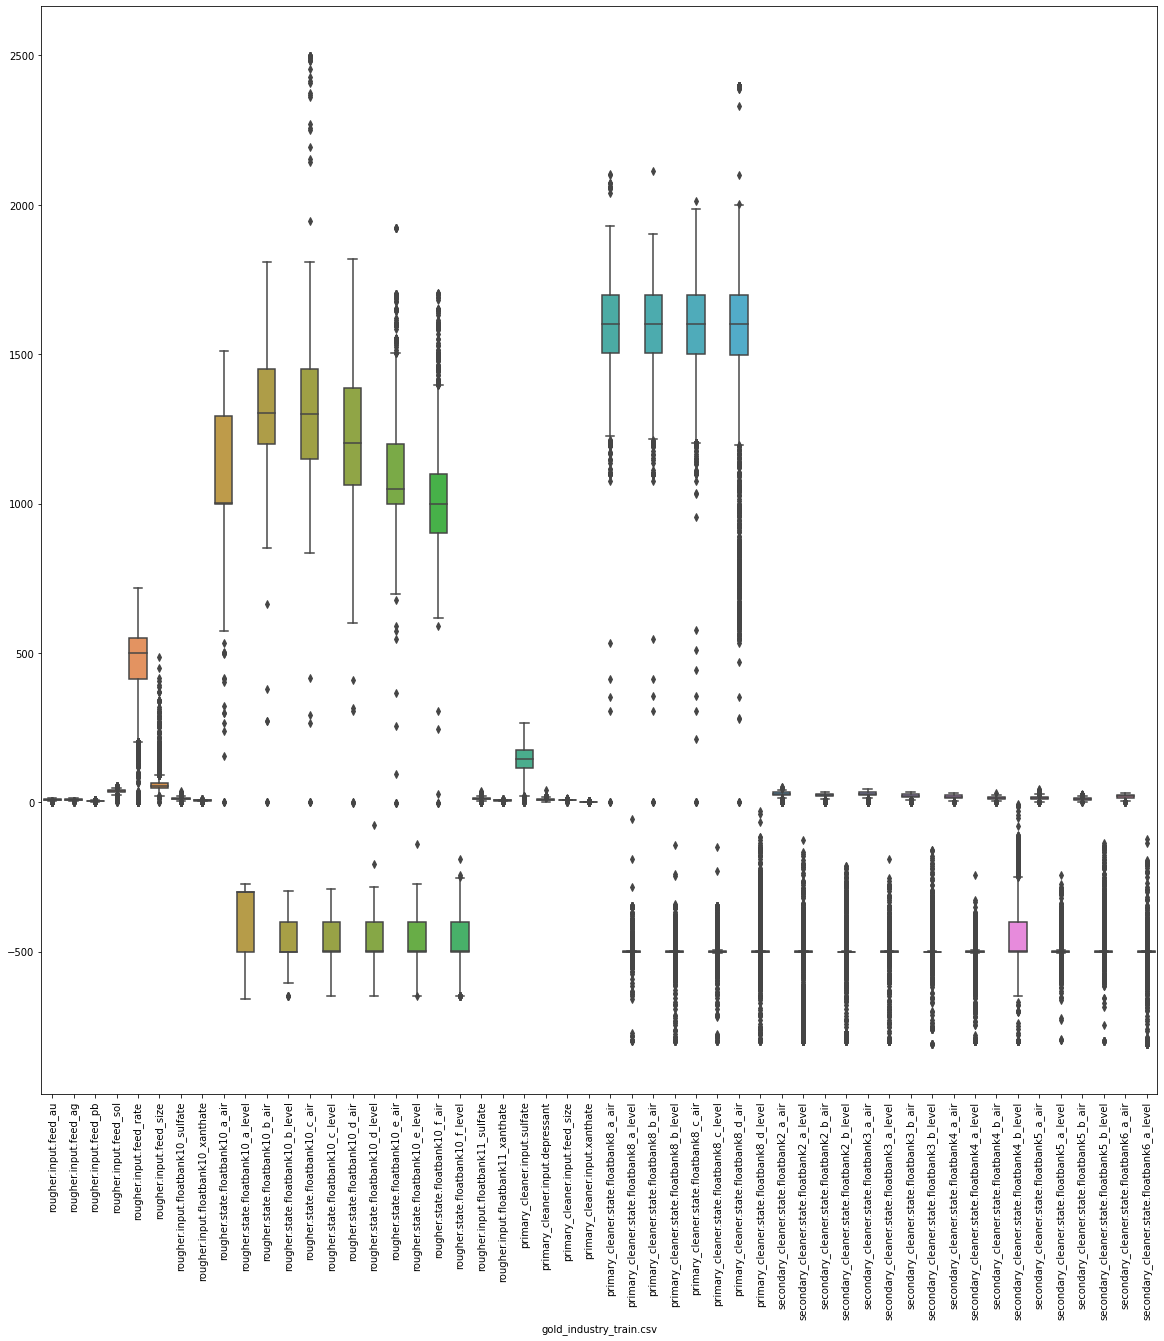

In [13]:
plt.figure(figsize=(20, 20))
plt.xticks(rotation=90)
sns.boxplot(data=train[test.columns])

В данных есть выбросы, поэтому предпочтительнее использовать `RobustScaler` нежели `StandardScaler`

Учтем это далее при выстраивании пайплана обучения моделей

<div style="border: 3px solid rgb(0,0,0); padding: 20px">

### Итого
    
- Импортированы необходимые библиотеки, настроено окружение
- Получены исходные данные, предусмотрена обработка ошибок при их загрузке
- Проведен разведочный анализ данных
- Найдены и обработаны пропуски
- Оценена необходимость стандартизации значений в признаках
    
</div>

## Проанализируем данные 🧐

**В этом этапе будем анализировать следующее:**
- Как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.
- Тип распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Это нужно, так как если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
- Суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

### Изменения в концентрации металлов (Au, Ag, Pb)

Сохраним необходимые признаки и построим графики для более наглядной оценки

In [14]:
concentrate_features1 = [col for col in full_data.columns if (
    'concentrate_' in col or 'feed_' in col) and any(metal in col for metal in ['au', 'ag', 'pb'])]

display(HTML(
            pd.Series(concentrate_features1, name='Concentrate Features by step')
            .to_frame()
            .to_html()
    )
)

,Concentrate Features by step
0,rougher.input.feed_au
1,rougher.input.feed_ag
2,rougher.input.feed_pb
3,rougher.output.concentrate_au
4,rougher.output.concentrate_ag
5,rougher.output.concentrate_pb
6,primary_cleaner.output.concentrate_au
7,primary_cleaner.output.concentrate_ag
8,primary_cleaner.output.concentrate_pb
9,final.output.concentrate_au


Распределим признаки по группам, добавим названия

In [15]:
metals = {
    'au': 'Золото',
    'ag': 'Серебро',
    'pb': 'Свинец'
}

res_features = []

for metal, label in metals.items():
    res_features.append(
        ([feature for feature in concentrate_features1 if metal in feature], label))

concentrate_features1 = res_features
concentrate_features1

[(['rougher.input.feed_au',
   'rougher.output.concentrate_au',
   'primary_cleaner.output.concentrate_au',
   'final.output.concentrate_au'],
  'Золото'),
 (['rougher.input.feed_ag',
   'rougher.output.concentrate_ag',
   'primary_cleaner.output.concentrate_ag',
   'final.output.concentrate_ag'],
  'Серебро'),
 (['rougher.input.feed_pb',
   'rougher.output.concentrate_pb',
   'primary_cleaner.output.concentrate_pb',
   'final.output.concentrate_pb'],
  'Свинец')]

#### Строим график

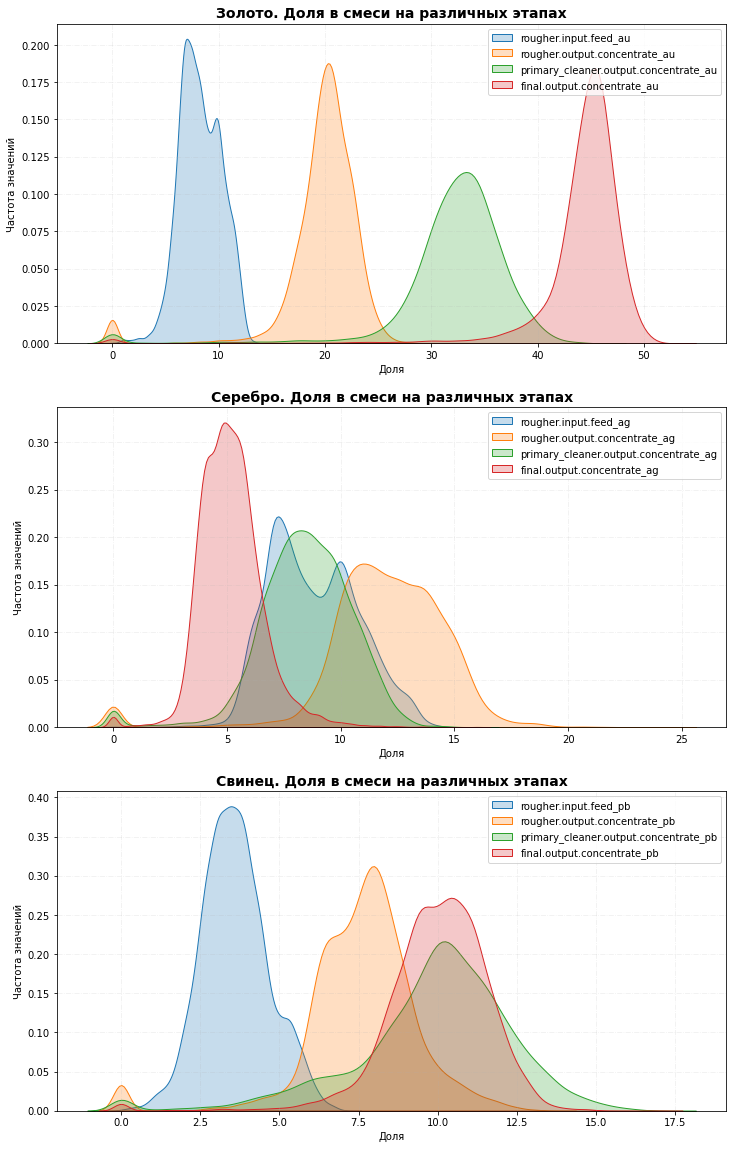

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 20))

for i, feature_kit in enumerate(concentrate_features1):
    features = feature_kit[0]
    label = feature_kit[1]

    for feature in features:
        sns.kdeplot(x=full_data[feature], ax=ax[i],
                    fill=True, label=f'{feature}')

    ax[i].set_title(f'{label}. Доля в смеси на различных этапах',
                    fontweight='bold', fontsize=14)
    ax[i].grid(alpha=.2, linestyle='-.')
    ax[i].set_xlabel('Доля')
    ax[i].set_ylabel('Частота значений')
    ax[i].legend()

Итак, по данным на графиках можно сказать следующее:
- Концентрация золота в процессе обработки сырья растет;
- Концентрация серебра уменьшается;
- Концентрация свинца растет.

По первым двум наблюдениям вопросов нет.

Но вот рост концентрации свинца - это не очень хорошо. 

Предположительно, это может быть связано с особенностями проведения флотации, если руда содержит примеси свинца. Поскольку флотация это сугубо физико-химический процесс, то свинец может не обладать определенными свойствами, которые нужны для проведения этого метода фильтрации.

Также не исключаем вариант того, что только что мы обнаружили ошибки в исходных данных, поэтому сообщим об этом.

### Распределения размеров гранул исходного сырья на обучающей и тестовой выборках

За размер гранул исходного сырья отвечает признак `rougher.input.feed_size`.

Для начала построим **графики распределения значений** в признаке для обеих выборок.

Далее нам потребуется **формулировка гипотез** для того, чтобы оценить значимость возможных различий по средним значениям в признаке. 

Для проверки этих гипотез будем использовать `t-test'а Стьюдента`. Уровень значимости возьмем равным `5%`.

**Сформулируем нулевую и альтернативную гипотезы:**

> $H_0$ - средние значения размеров гранул исходного сырья в обучающей выборке и тестовой выборке не отличаются статистически

> $H_1$ - средние значения размеров гранул исходного сырья в обучающей выборке и тестовой выборке отличаются статистически

#### Строим график

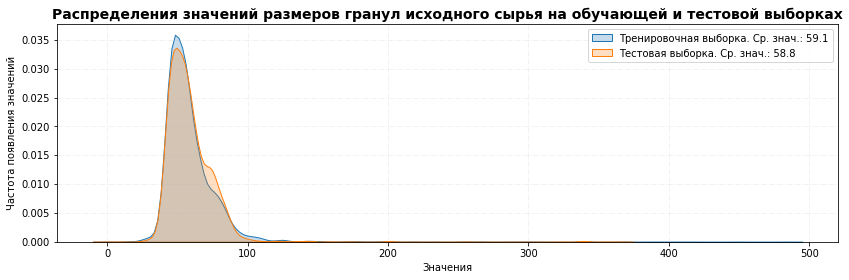

In [17]:
plt.figure(figsize=(14, 4))

# Распределение значений в тренировочном наборе
sns.kdeplot(train['rougher.input.feed_size'], fill=True, label='Тренировочная выборка. Cр. знач.: {}'.format(
    np.round(train['rougher.input.feed_size'].mean(), 1)))
# Распределение значений в тестовом наборе
sns.kdeplot(test['rougher.input.feed_size'], fill=True, label='Тестовая выборка. Ср. знач.: {}'.format(
    np.round(test['rougher.input.feed_size'].mean(), 1)))


plt.title(f'Распределения значений размеров гранул исходного сырья на обучающей и тестовой выборках',
          fontweight='bold', fontsize=14)
plt.grid(alpha=.2, linestyle='-.')
plt.xlabel('Значения')
plt.ylabel('Частота появления значений')
plt.legend()

Согласно значениям средних, велика вероятность того, что статистически значимых отличий нет. Но для пущей уверенности убедимся в этом, используя стат методы

In [18]:
alpha = .05  # Уровень значимости

result = st.ttest_ind(train['rougher.input.feed_size'],
                      test['rougher.input.feed_size'])

if result.pvalue < alpha:
    print(
        f'pvalue: {result.pvalue} < alpha: {alpha}'
        f' ⇒ Отвергаем нулевую гипотезу.\nСтатистически значимые различия средних есть')
else:
    print(
        f'pvalue: {result.pvalue} > alpha: {alpha}'
        f' ⇒ Принимаем нулевую гипотезу.\nСтатистически значимые различия средних отсутствуют')

pvalue: 0.4466458693106691 > alpha: 0.05 ⇒ Принимаем нулевую гипотезу.
Статистически значимые различия средних отсутствуют


**Сильных различий в распределениях значений не выявлено 👍🏻**

Идем дальше...

### Cуммарная концентрация металлов (Au, Ag, Pb) на разных стадиях

**Будем рассматривать показатели концентрации на следующих стадиях:**

Сырье:
- `rougher.input`

Флотация (черновой концентрат):
- `rougher.output`

Первичная очистка (концентрат после первой очистки):
- `primary_cleaner.output`

Финальный концентрат:
- `final.output`

В первую очередь, для каждого этапа требуется найти суммарную долю золота, серебра и свинца в смеси.

Начнем с того, что чуть преобразуем ранее созданный список с признаками под условия текущей задачи

In [19]:
rougher_input = []
rougher_output = []
primary_cleaner = []
final_output = []

for feature_kit in res_features:

    rougher_input.append(feature_kit[0][0])

    rougher_output.append(feature_kit[0][1])

    primary_cleaner.append(feature_kit[0][2])

    final_output.append(feature_kit[0][3])

res_sum_stages = []

res_sum_stages.append((rougher_input, 'До проведения флотации'))
res_sum_stages.append((rougher_output, 'После проведения флотации'))
res_sum_stages.append((primary_cleaner, 'После проведения первичной очистки'))
res_sum_stages.append((final_output, 'Финальный этап'))

res_sum_stages

[(['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb'],
  'До проведения флотации'),
 (['rougher.output.concentrate_au',
   'rougher.output.concentrate_ag',
   'rougher.output.concentrate_pb'],
  'После проведения флотации'),
 (['primary_cleaner.output.concentrate_au',
   'primary_cleaner.output.concentrate_ag',
   'primary_cleaner.output.concentrate_pb'],
  'После проведения первичной очистки'),
 (['final.output.concentrate_au',
   'final.output.concentrate_ag',
   'final.output.concentrate_pb'],
  'Финальный этап')]

👍🏻 Теперь можно с легкостью посчитать интересующие нас показатели и перенести все это на график

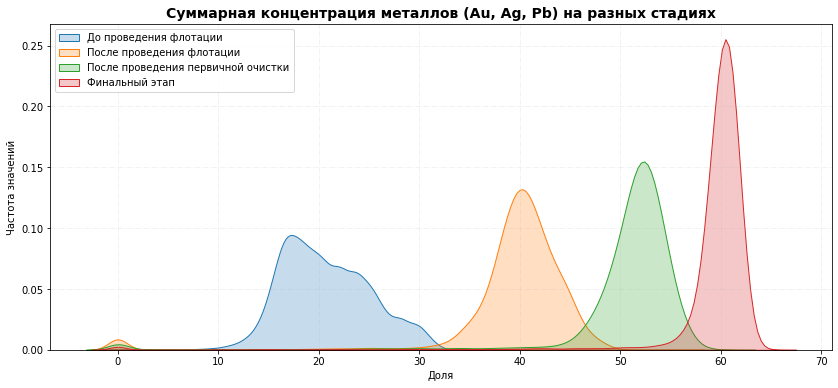

In [20]:
def sum_concentration_graph():
    plt.figure(figsize=(14, 6))

    for i, feature_kit in enumerate(res_sum_stages):
        features = feature_kit[0]
        label = feature_kit[1]

        stage_sum_concetration =  full_data[features[0]] + \
                                  full_data[features[1]] + \
                                  full_data[features[2]]

        sns.kdeplot(x=stage_sum_concetration, fill=True, label=label)

    plt.title(
        'Cуммарная концентрация металлов (Au, Ag, Pb) на разных стадиях', 
        fontweight='semibold', fontsize=14)
    plt.grid(alpha=.2, linestyle='-.')
    plt.xlabel('Доля')
    plt.ylabel('Частота значений')
    plt.legend(loc='upper left')

sum_concentration_graph()

**Наблюдается рост суммарной концентрации металлов в процессе очистки руды от примесей.**

Присутствуют нулевые значения, которые могли возникнуть по причине малого содержания металлов в руде или  ошибочных измерений датчиков. Их стоит удалить.

Для понимания того, что является выбросом, построим диаграммы размаха значений для каждого из этапов

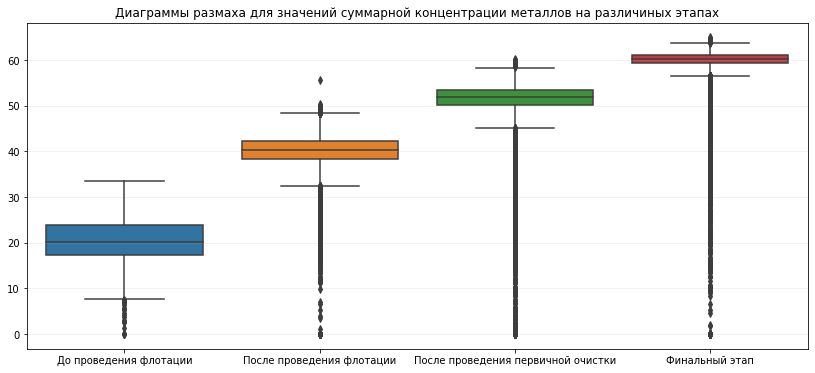

In [21]:
def stages_concentration_boxplots(data=None):
    
    stages_concentration_info = []
    labels = []

    plt.figure(figsize=(14, 6))

    for i, feature_kit in enumerate(res_sum_stages):
        features = feature_kit[0]
        label = feature_kit[1]

        stage_sum_concetration =  full_data[features[0]] + \
                                  full_data[features[1]] + \
                                  full_data[features[2]]

        stages_concentration_info.append(stage_sum_concetration)
        labels.append(label)

    if data is not None:
        sns.boxplot(data=data[[
            'rougher.input.feed_sum', 
            'rougher.output.concentrate_sum', 
            'primary_cleaner.output.concentrate_sum', 
            'final.output.concentrate_sum']])
    else:
        sns.boxplot(data=stages_concentration_info)
        
    plt.title(
        'Диаграммы размаха для значений суммарной концентрации металлов на различиных этапах')
    plt.xticks(ticks=np.arange(0, 4, 1), labels=labels)
    plt.grid(alpha=.2, axis='y')
stages_concentration_boxplots()

#### Устранение выбросов

Наблюдаются довольно "большие хвосты" значений во всех этапах без исключения.

Чтобы не удалить большое количество потенциально важых измерений, требуется определить порог, при котором значение будет считаться выбросом.

Самым простым и надежным вариантом будет использование **межквартильного подхода к удалению выбросов**. Т.е. верхняя и нижняя границы допустимого диапазона значений определяются как $({Q_3} + k * IQR; {Q_1} - k * IQR)$, где $k$ - произвольный коэффициент, и чем он выше, тем больше значений-выбросов мы оставим. Значение $k$ равное *6* будет оптимальным.

Для реализации задуманного напишем функцию `remove_outliers`

In [22]:
full_data['rougher.input.feed_sum'] = full_data[res_sum_stages[0][0]].sum(axis=1)

full_data['rougher.output.concentrate_sum'] = full_data[res_sum_stages[1][0]].sum(axis=1)

full_data['primary_cleaner.output.concentrate_sum'] = full_data[res_sum_stages[2][0]].sum(axis=1)

full_data['final.output.concentrate_sum'] = full_data[res_sum_stages[3][0]].sum(axis=1)

full_data_length = len(full_data)

In [23]:
def remove_outliers(data, columns, k):
    start_objects = len(data)
    outliers_indexes_in_data = []
    for col in columns:
        Q1 = data[col].quantile(.25)
        Q3 = data[col].quantile(.75)
        IQR = Q3 - Q1
        lower = Q1 - k * IQR
        upper = Q3 + k * IQR
        
        outliers = data[(data[col] < lower) | (data[col] > upper)]
        outliers_indexes_in_data.extend(list(outliers.index))
        
        if len(outliers):
            data.drop(
                index=outliers.index, 
                inplace=True)
    deleted_objects = start_objects - len(data)
    return data, deleted_objects, outliers_indexes_in_data

Всего было удалено 1384 измерений.
Доля удаленных объектов составила 7.12%


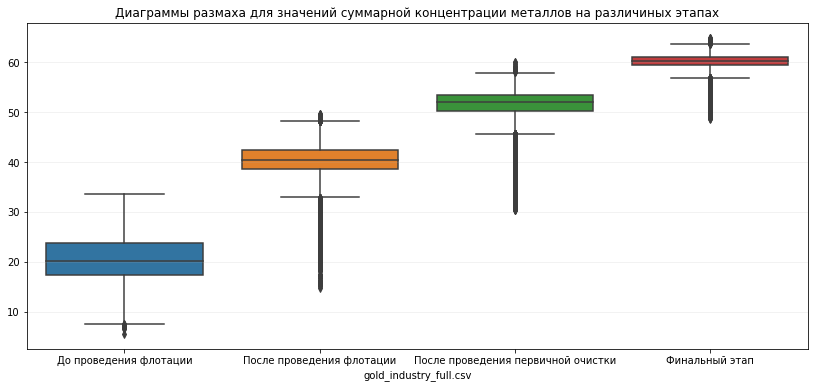

In [24]:
removed_outliers_result = remove_outliers(
        full_data, 
        ['rougher.input.feed_sum', 
         'rougher.output.concentrate_sum', 
         'primary_cleaner.output.concentrate_sum', 
         'final.output.concentrate_sum'], 
        k=6
    )


stages_concentration_boxplots(
    removed_outliers_result[0]
)

print(
    f'Всего было удалено {removed_outliers_result[1]} измерений.\n'
    'Доля удаленных объектов составила {:.2%}'.format(removed_outliers_result[1]/full_data_length))

Порядок!👍🏻 Теперь снова взглянем на график распределения суммарных концентраций на различных этапах

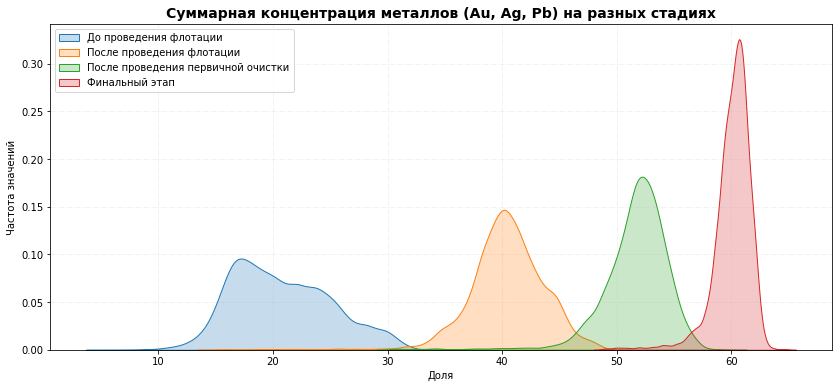

In [25]:
sum_concentration_graph()

Выглядит намного лучше!⚡️

<div style="border: 3px solid rgb(0,0,0); padding: 20px">

### Итого
    
Было исследовано:
    
> *Как меняется концентрация металлов (Au, Ag, Pb) на различных этапах?*

**Вывод:** 
- Концентрация золота в процессе обработки сырья растет;
- Концентрация серебра уменьшается;
- Концентрация свинца растет. Это не очень хорошо. Возможно, это связано с особыми физико-химическими свойствами металла, либо с особенностями процесса флотации, либо с ошибками в данных. (это выясним у тех, кто предоставлял данные)
    
> *Значимо ли отличие в распределении значений размеров гранул исходного сырья на обучающей и тестовой выборках?*
 
**Вывод:**
    
Согласно результатам проведенного Т-тестирования Стьюдента, **статистически значимых отличий между значениями средних двух независимых выборок не выявлено.** По-простому -  отличий нет.
    
> *Как меняется суммарная концентрация металлов в смеси на разных стадиях?*
    
**Вывод:**
    
Наблюдается рост суммарной концентрации металлов в процессе очистки руды от примесей. Присутствуют нулевые значения, которые могут быть связаны со слабой концентрацией добываемых металлов в сырье.

Также в ходе выполнения этого этапа были устранены значения-выбросы 
</div>

## Обучение моделей, поиск лучших 🦾

В нашем исследовании будем сравнивать эффективность двух моделей регрессии:
- `LinearRegression`
- `RandomForestRegressor`

Выбор обусловлен тем, что использование более сложных алгоритмов вряд ли кардинально улучшит качество предсказаний.

В качестве **метрики качества** наших моделей будем использовать `sMAPE` (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»). Она похожа на `MAE`, но выражается не в абсолютных величинах, а в относительных. 

*Почему симметричная?* Она одинаково учитывает масштаб и целевого признака, и предсказания.

Вычисляется она следующим образом:

$sMAPE = \frac{1}{N}\sum\limits_{i=1}^N\frac{|y_i - \hat{y_i}|}{(|y_i|+|\hat{y_i}|)/2}\cdot100\%$, где: 

${y_i}$ - значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество; 

$\hat{y_i}$ - значение предсказания для объекта с порядковым номером i, например, в тестовой выборке; 

$N$ - количество объектов в выборке; 

$\frac{1}{N}\sum\limits_{i=1}^N$ - суммирование по всем объектам выборки *(i меняется от 1 до N)*

---

Ну, и поскольку **целевых признаков два**, то требуется ввести еще одну метрику - `final sMAPE`. По сути, в ней просто обобщим `sMAPE` для двух признаков в зависимости от важности их прогнозирования.

Она же вычисляется так:

$final \, sMAPE = 25\%\cdot sMAPE(rougher)+75 \%\cdot sMAPE(final)$

### Оцениваемые метрики

Начнем с создания функций, которые посчитают `sMAPE` и `final sMAPE`

In [26]:
def smape(y, y_pred):
    return np.mean(np.abs(y - y_pred) / ((np.abs(y) + np.abs(y_pred)) / 2)) * 100


def final_smape(smape_rougher, smape_final):
    return .25 * smape_rougher + .75 * smape_final

### Подготовка данных...

In [27]:
TARGETS = ['rougher.output.recovery', 'final.output.recovery']

In [28]:
objects_removed_while_preprocessed = removed_outliers_result[2]


train = train[~(train.index.isin(objects_removed_while_preprocessed))]
test = test[~(test.index.isin(objects_removed_while_preprocessed))]
test[TARGETS] = full_data.loc[test.index, TARGETS]
train = train[test.columns]

display(
    train.head(), train.shape)
display(test.head(), test.shape)

gold_industry_train.csv,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,11.996163,6.012594,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,-400.074028,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,11.920305,6.204633,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,26.005245,-499.929616,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,-400.200179,1600.059442,-450.619948,1600.012842,-449.910497,1597.7251

(13376, 54)

gold_industry_test.csv,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575,89.514960,70.281454
2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,89.858126,65.523246
2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,1648.953828,-400.468641,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155,91.816623,74.817644
2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,1052.601592,-499.695075,955.171539,

(4371, 54)

**Немного о логике использования признаков.**

Как мы помним, целевых признака у нас два: <code>rougher.output.recovery</code> и <code>final.output.recovery</code>

Если с последним все довольно просто: для обучения модели нужно предоставить все имеющиеся признаки, то в случае с <code>rougher.output.recovery</code> требуется чуть изменить трейн и тест, так как для предсказания значений этого признака модели не нужны фичи, которые рассчитываются позднее этапа флотации. *+ это может привести к утечке таргета.*

#### Тренировочный набор для целевого признака <code>rougher.output.recovery</code>

In [29]:
rougher_train = train[[
    col for col in train.columns 
        if 'rougher.input' in col 
        or 'rougher.state' in col 
        or col == 'rougher.output.recovery']]

rougher_train.head()

gold_industry_train.csv,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.recovery
date,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,87.107763
2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,11.996163,6.012594,86.843261
2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,-400.074028,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,11.920305,6.204633,86.842308
2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,-400.200179,1600.059442,-450.619948,1600.012842,-449.910497,1597.725177,-450.130127,1400.943157,-450.030142,1400.234743,-449.790835,11.692450,6.196578,87.226430
2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,-399.752729,1600.208824,-449.599614,1600.357732,-450.034364,1599.759049,-449.909799,1401.560902,-448.877187,1401.160227,-450.407128,10.960521,6.194897,86.688794


#### Тестовый набор для целевого признака <code>rougher.output.recovery</code>

In [30]:
rougher_test = test[[
    col for col in test.columns 
        if 'rougher.input' in col 
        or 'rougher.state' in col 
        or col == 'rougher.output.recovery']]
rougher_test.head()

gold_industry_test.csv,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.recovery
date,,,,,,,,,,,,,,,,,,,,,,,
2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,89.514960
2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,89.858126
2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,91.816623
2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,1052.601592,-499.695075,955.171539,-500.294989,851.957342,-499.779541,850.765662,-501.030559,6.929364,8.920717,88.478959
2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,-300.283401,1099.481500,-499.702465,999.539264,-499.306051,889.445596,-498.118617,800.533525,-499.765068,800.510356,-497.289533,7.824875,7.500678,89.230316


#### Тренировочный набор для целевого признака <code>final.output.recovery</code>

In [31]:
final_train = train.drop(columns=['rougher.output.recovery']) # Исключаем 'rougher.output.recovery'
final_train.head()

gold_industry_train.csv,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,70.541216
2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,11.996163,6.012594,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,69.266198
2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,-400.074028,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,11.920305,6.204633,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,26.005245,-499.929616,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,68.116445
2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,-400.200179,1600.059442,-450.619948,1600.012842,-449.910497,1597.725177,-450.130127,1400.943157,-450.030142,1400.234743,-449

#### Тестовый набор для целевого признака <code>final.output.recovery</code>

In [32]:
final_test = test.drop(columns=['rougher.output.recovery']) # Исключаем 'rougher.output.recovery'
final_test.head()

gold_industry_test.csv,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575,70.281454
2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,65.523246
2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,1648.953828,-400.468641,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155,74.817644
2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,1052.601592,-499.695075,955.171539,-500.294989,851.957342,-499.779541,850.765662,-501.0305

Наборы с данными теперь уж точно полностью подготовлены к проведению дальнейшего исследования, поэтому переходим к разработке логике обучения моделей

### Процесс обучения моделей: стандартизация данных, подбор гиперпараметров, отбор лучших

Итак, наконец-то мы подошли к самому интересному, а именно процессу обучения наших моделей.

**Будет выстроена следующая логика:**
- Функция `learning_process`. На вход принимает следующие параметры:

    - `model` - ML-модель без настроенных гиперпараметров, качество которой проверяем;
    
    - `train_data` - обучающая выборка для модели;
     
    - `scaler` - алгоритм стандартизации данных;
    
    - `gs_grid` - сетка параметров для передачи их в GridSearchCV;
    
    - `gs_scorer` - метрика, по которой оцениваем качество предсказаний модели;
    
    - `cv_folds` - кол-во подвыборок для кросс-валидации в GridSearchCV
    
    
- В самой функции будет выполняться следующая последовательность действий:
    1. Стандартизация данных;
    2. Подбор гиперпараметров через `GS`, оценка качества по среднему `sMAPE` при `кросс-валидации`.
    3. Обучение модели с наилучшим набором гиперпараметров. Вычисление ключевой метрики. 
    4. Функция возвращает метрику качества предсказаний модели, наилучший набор гиперпараметров модели

Вперед!💪🏼

In [33]:
SCORER = make_scorer(smape, greater_is_better=False)

In [35]:
def learning_process(model: 'sklearn ML-model',
                     train_data: pd.DataFrame,
                     target_name: str,
                     scaler: 'sklearn.preprocessing Scaler',
                     gs_grid: Dict,
                     gs_scorer: 'sklearn.metrics.make_scorer()',
                     cv_folds: int = 5,
                     print_results: bool = False) -> Tuple:
    
    '''Функция для обучения ML-моделей

            Параметры:
                    model (Sklearn ML-model) : ML-модель без настроенных гиперпараметров, качество которой проверяем;
                    train_data (pd.DataFrame) : Обучающая выборка для модели;
                    target_name (str) : Название целевого признака в данных;
                    scaler (Sklearn.preprocessing any Scaler) : Стандартизатор/нормализатор из sklearn для данных;
                    gs_grid (dict) : Сетка параметров для GridSearchCV;
                    gs_scorer (sklearn.metrics.make_scorer()) : Кастомная метрика из make_scorer() для оценки качества предсказаний model;
                    cv_folds (int, по умолч. '5') : Количество подвыборок при кросс-валидации в GridSearchCV;
                    print_results (bool, по умолч. 'False') : Вывести результаты работы функции на печать.

            Возвращает:
                    Кортеж, состоящий из: 
                    модель с наилучшим набором гиперпараметров, 
                    словарь с наилучшими гиперпараметрами для модели, 
                    наилучшее значение метрики из gs_scorer.

    '''
    
    all_start_time = time()
    
    X_train = train_data.drop(columns=[target_name]) # Признаки
    y_train = train_data[target_name] # Целевой признак
    
    # Стандартизация данных
    try:
        start_time = time()
        numeric_cols = X_train.select_dtypes(include='number').columns
        scaler.fit(X_train[numeric_cols])
        X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
        print(f'✅Успех! Стандартизация входных данных выполнена успешно.\n'
              f'⏱Время выполнения этапа: {np.round(time() - start_time, 2)} c.\n')
    except:
        raise Exception(
            '❌Ошибка! Стандартизация входных данных не выполнена успешно.')

    # Подбор гиперпараметров

    try:
        start_time = time()
        
        GS = GridSearchCV(model, 
                          gs_grid, 
                          scoring=gs_scorer,
                          cv=KFold(n_splits=cv_folds, shuffle=True, random_state=STATE), 
                          refit=True, 
                          verbose=1, 
                          n_jobs=-1)
        
        GS.fit(X_train, y_train)

        best_hyperparams = GS.best_params_ # Наилучший набор гиперпараметров
        best_score = - GS.best_score_ # Наилучшее среднее значение метрики при кросс-валидации
        best_model = GS.best_estimator_ # Модель с наилучшим набором гиперпараметров

        print(f'\n✅Успех! Подбор гиперпараметров с помощью GridSearchCV выполнен успешно.\n'
              f'⏱Время выполнения этапа: {np.round(time() - start_time, 2)} c.\n')
    except:
        raise Exception(
            '❌Ошибка! Подбор гиперпараметров с помощью GridSearchCV не выполнен успешно.')
    
    # Вывод результатов на печать
    if print_results:
        print(f'ℹ️\nНазвание данных: {train_data.columns.name}\n'
              f'Название целевого признака: {target_name}\n'
              f'Сетка гиперпараметров для GridSearchCV: {gs_grid}\n'
              f'Количество подвыборок при кросс-валидации в GridSearchCV: {cv_folds}\n'
              f'Метод стандартизации/нормализации данных: {str(scaler)}\n\n\n\n'
              f'\t\t\t\t\t💯Результаты\n\n'
              f'Наилучший набор гиперпараметров: {best_model}\n\n'
              f'Средний показатель оцениваемой метрики при кросс-валидации: {best_score}\n\n\n\n'
              f'⏱Всего затрачено времени: {np.round(time() - all_start_time, 2)} с.')   
    return best_model, best_hyperparams, best_score, scaler

Наша прекрасная функция готова, поэтому приступаем к "сбору" результатов обучения моделей⚡️

In [36]:
learning_results = []

#### Линейная регрессия 📈

##### `rougher.output.recovery`

In [37]:
LR_GS_GRID = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

lr_target1_results = learning_process(LinearRegression(), 
                                      rougher_train, 
                                      'rougher.output.recovery', 
                                      RobustScaler(), 
                                      gs_grid=LR_GS_GRID,
                                      gs_scorer=SCORER,
                                      cv_folds=5,
                                      print_results=True)

✅Успех! Стандартизация входных данных выполнена успешно.
⏱Время выполнения этапа: 0.02 c.

Fitting 5 folds for each of 4 candidates, totalling 20 fits

✅Успех! Подбор гиперпараметров с помощью GridSearchCV выполнен успешно.
⏱Время выполнения этапа: 3.13 c.

ℹ️
Название данных: gold_industry_train.csv
Название целевого признака: rougher.output.recovery
Сетка гиперпараметров для GridSearchCV: {'fit_intercept': [True, False], 'positive': [True, False]}
Количество подвыборок при кросс-валидации в GridSearchCV: 5
Метод стандартизации/нормализации данных: RobustScaler()



					💯Результаты

Наилучший набор гиперпараметров: LinearRegression()

Средний показатель оцениваемой метрики при кросс-валидации: 4.664621678941077



⏱Всего затрачено времени: 3.16 с.


##### `final.output.recovery`

In [38]:
lr_target2_results = learning_process(LinearRegression(), 
                                      final_train, 
                                      'final.output.recovery', 
                                      RobustScaler(), 
                                      gs_grid=LR_GS_GRID,
                                      gs_scorer=SCORER,
                                      cv_folds=5,
                                      print_results=True)

✅Успех! Стандартизация входных данных выполнена успешно.
⏱Время выполнения этапа: 0.12 c.

Fitting 5 folds for each of 4 candidates, totalling 20 fits

✅Успех! Подбор гиперпараметров с помощью GridSearchCV выполнен успешно.
⏱Время выполнения этапа: 4.67 c.

ℹ️
Название данных: gold_industry_train.csv
Название целевого признака: final.output.recovery
Сетка гиперпараметров для GridSearchCV: {'fit_intercept': [True, False], 'positive': [True, False]}
Количество подвыборок при кросс-валидации в GridSearchCV: 5
Метод стандартизации/нормализации данных: RobustScaler()



					💯Результаты

Наилучший набор гиперпараметров: LinearRegression()

Средний показатель оцениваемой метрики при кросс-валидации: 7.535795686981858



⏱Всего затрачено времени: 4.79 с.


In [39]:
lr_final_smape = final_smape(
    lr_target1_results[2], lr_target2_results[2])

learning_results.append(
    (lr_target1_results, lr_target2_results, lr_final_smape)
)

print(f'Финальное значение sMAPE модели линейной регрессии по средним оценкам: '
      f'{lr_final_smape}')

Финальное значение sMAPE модели линейной регрессии по средним оценкам: 6.818002184971664


#### Случайный лес 🌳

##### `rougher.output.recovery`

In [40]:
RFR_GS_GRID = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 4]
}

rfr_target1_results = learning_process(RandomForestRegressor(), 
                                       rougher_train, 
                                       'rougher.output.recovery', 
                                       RobustScaler(), 
                                       gs_grid=RFR_GS_GRID,
                                       gs_scorer=SCORER,
                                       cv_folds=4,
                                       print_results=True)

✅Успех! Стандартизация входных данных выполнена успешно.
⏱Время выполнения этапа: 0.09 c.

Fitting 4 folds for each of 36 candidates, totalling 144 fits

✅Успех! Подбор гиперпараметров с помощью GridSearchCV выполнен успешно.
⏱Время выполнения этапа: 1260.33 c.

ℹ️
Название данных: gold_industry_train.csv
Название целевого признака: rougher.output.recovery
Сетка гиперпараметров для GridSearchCV: {'n_estimators': [100, 150, 200], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 4], 'min_samples_leaf': [2, 4]}
Количество подвыборок при кросс-валидации в GridSearchCV: 4
Метод стандартизации/нормализации данных: RobustScaler()



					💯Результаты

Наилучший набор гиперпараметров: RandomForestRegressor(max_depth=7, min_samples_leaf=4, n_estimators=150)

Средний показатель оцениваемой метрики при кросс-валидации: 3.430802122923974



⏱Всего затрачено времени: 1260.42 с.


##### `final.output.recovery`

In [41]:
rfr_target2_results = learning_process(RandomForestRegressor(), 
                                       final_train, 
                                       'final.output.recovery', 
                                       RobustScaler(), 
                                       gs_grid=RFR_GS_GRID,
                                       gs_scorer=SCORER,
                                       cv_folds=4,
                                       print_results=True)

✅Успех! Стандартизация входных данных выполнена успешно.
⏱Время выполнения этапа: 0.04 c.

Fitting 4 folds for each of 36 candidates, totalling 144 fits

✅Успех! Подбор гиперпараметров с помощью GridSearchCV выполнен успешно.
⏱Время выполнения этапа: 3003.36 c.

ℹ️
Название данных: gold_industry_train.csv
Название целевого признака: final.output.recovery
Сетка гиперпараметров для GridSearchCV: {'n_estimators': [100, 150, 200], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 4], 'min_samples_leaf': [2, 4]}
Количество подвыборок при кросс-валидации в GridSearchCV: 4
Метод стандартизации/нормализации данных: RobustScaler()



					💯Результаты

Наилучший набор гиперпараметров: RandomForestRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=4,
                      n_estimators=200)

Средний показатель оцениваемой метрики при кросс-валидации: 6.424480312827544



⏱Всего затрачено времени: 3003.4 с.


In [42]:
rfr_final_smape = final_smape(
    rfr_target1_results[2], rfr_target2_results[2])

learning_results.append(
    (rfr_target1_results, rfr_target2_results, rfr_final_smape)
)

print(f'Финальное значение sMAPE модели случайного леса по средним оценкам: '
      f'{rfr_final_smape}')

Финальное значение sMAPE модели случайного леса по средним оценкам: 5.676060765351652


### Сравнение результатов

Результаты соберем в датафрейм

In [43]:
train_results = pd.DataFrame(
    {
        'sMAPE : rougher.output.recovery' : [lr_target1_results[2], rfr_target1_results[2]],
        'sMAPE : final.output.recovery' : [lr_target2_results[2], rfr_target2_results[2]],
        'Final sMAPE' : [lr_final_smape, rfr_final_smape]
    },
    index=[
        'LinearRegression', 
        'RandomForestRegressor'
    ]
)
train_results.sort_values(by='Final sMAPE')

,sMAPE : rougher.output.recovery,sMAPE : final.output.recovery,Final sMAPE
RandomForestRegressor,3.430802,6.424480,5.676061
LinearRegression,4.664622,7.535796,6.818002


Итак, лучшее значение метрики `final sMAPE` показывает **`RandomForestRegressor`**.

Благодаря использованию стандартизации данных и кросс-валидации при обучении моделей, удалось снизить влияние "случайных" велчин и получить лучшее качество модели на выходе.

Согласно значению `final sMAPE`, в 89 из 100 случаев модель предсказывает верное значение, что является неплохим показателем.

Переходим к проверке моделей на тесте

<div style="border: 3px solid rgb(0,0,0); padding: 20px">

### Итого
    
- Созданы функции для рассчета метрик `sMAPE` и `Final sMAPE`. Эти метрики использовались для оценки качества предсказаний моделей.
- Полностью подготовлены данные для моделей - разделили фичи и таргет в выборках
- Выстроена логика обучения моделей в соответствующей функции.
- Модели обучены, получены значения метрик:
    - **LinearRegression**:
        - `rougher.output.recovery` -> sMAPE = было до исправлений: *11.536859*, стало после *4.664622*
        - `final.output.recovery` -> sMAPE = было до исправлений: *9.377075*, стало после *7.535796*
        - **`Final sMAPE`** -> было до исправлений: *9.917021*, стало после *6.818002*
    
    - **RandomForestRegressor**:
        - `rougher.output.recovery` -> sMAPE = было до исправлений: *10.610962*, стало после *3.430802*
        - `final.output.recovery` -> sMAPE = было до исправлений: *8.058713*, стало после *6.424480*
        - **`Final sMAPE`** -> было до исправлений: *8.696775*, стало после *5.676061*
</div>

## Тестирование моделей 🔥

Как было установлено в предыдущем этапе: лучшее качество предсказаний показывает модель **`RandomForestRegressor`**.

В этом шаге проведем тестирование моделей и проверим их на адекватность, сравнив с константной моделью

Для начала рассортируем фичи и таргет во всех наборах по соответствующим переменным и сохраним модели с уже подобранными гиперпараметрами в соответствующие переменные для удобного доступа к ним далее.

In [44]:
rfr_rougher_scaler = rfr_target1_results[3]
rfr_final_scaler = rfr_target2_results[3]

In [45]:
rougher_train_features = rfr_rougher_scaler.transform(rougher_train.drop(columns=['rougher.output.recovery']))
rougher_train_target = rougher_train['rougher.output.recovery']

rougher_test_features = rfr_rougher_scaler.transform(rougher_test.drop(columns=['rougher.output.recovery']))
rougher_test_target = rougher_test['rougher.output.recovery']

In [46]:
final_train_features = rfr_final_scaler.transform(final_train.drop(columns=['final.output.recovery']))
final_train_target = train['final.output.recovery']

final_test_features = rfr_final_scaler.transform(final_test.drop(columns=['final.output.recovery']))
final_test_target = final_test['final.output.recovery']

In [47]:
rougher_output_recovery_model = rfr_target1_results[0]
final_output_recovery_model = rfr_target2_results[0]

model1 = rougher_output_recovery_model
model1.fit(rougher_train_features, rougher_train_target)

model2 = final_output_recovery_model
model2.fit(final_train_features, final_train_target)

RandomForestRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=4,
                      n_estimators=200)

### `rougher.output.recovery`

In [48]:
# Вычисляем значение sMAPE RandomForestRegressor для предсказания целевого признака rougher.output.recovery

model1_predictions = model1.predict(rougher_test_features)
model1_smape = smape(rougher_test_target, model1_predictions)

print(f'Значение sMAPE RandomForestRegressor '
      f'для предсказания целевого признака rougher.output.recovery: '
      f'{model1_smape}')

Значение sMAPE RandomForestRegressor для предсказания целевого признака rougher.output.recovery: 3.384383337713909


### `final.output.recovery`

In [49]:
# Вычисляем значение sMAPE RandomForestRegressor для предсказания целевого признака final.output.recovery

model2_predictions = model2.predict(final_test_features)
model2_smape = smape(final_test_target, model2_predictions)

print(f'Значение sMAPE RandomForestRegressor '
      f'для предсказания целевого признака final.output.recovery: '
      f'{model2_smape}')

Значение sMAPE RandomForestRegressor для предсказания целевого признака final.output.recovery: 6.415512630224988


### `Final sMAPE`

In [50]:
# Вычисляем Final sMAPE для метрик sMAPE моделей, предсказывающих два целевых признака

models_final_smape = final_smape(model1_smape, model2_smape)

print(f'Значение Final sMAPE для метрик sMAPE моделей, предсказывающих два целевых признака: {models_final_smape}')

Значение Final sMAPE для метрик sMAPE моделей, предсказывающих два целевых признака: 5.657730307097219


In [51]:
test_results = pd.DataFrame(
    {
        'sMAPE : rougher.output.recovery' : [model1_smape],
        'sMAPE : final.output.recovery' : [model2_smape],
        'Final sMAPE' : [models_final_smape]
    },
    index=[ 
        'RandomForestRegressor'
    ]
)

test_results

,sMAPE : rougher.output.recovery,sMAPE : final.output.recovery,Final sMAPE
RandomForestRegressor,3.384383,6.415513,5.65773


Значения все оцениваемых метрик получены и выглядят весьма хорошо! 💯

> `sMAPE : rougher.output.recovery` : было до внесения исправлений *4.939385*, стало после *3.384383*

> `sMAPE : final.output.recovery` : было до внесения исправлений *7.690571*, стало после  *6.415513*

> `Final sMAPE` : было до внесения исправлений *7.002774*, стало после *5.65773*

Теперь проверим модели на адекватность

### Проверка моделей на адекватность

#### `DummyRegressor`

В качестве константной модели будем использовать `DummyRegressor`

##### `rougher.output.recovery`

In [52]:
dummy_model1 = DummyRegressor(strategy='mean') 
dummy_model1.fit(rougher_train_features, rougher_train_target)
dummy1_smape = smape(rougher_test_target, dummy_model1.predict(rougher_test_features))
print('Значение sMAPE DummyRegressor для таргета rougher.output.recovery:', dummy1_smape)

Значение sMAPE DummyRegressor для таргета rougher.output.recovery: 5.93946215034253


##### `final.output.recovery`

In [53]:
dummy_model2 = DummyRegressor(strategy='mean') 
dummy_model2.fit(final_train_features, final_train_target)
dummy2_smape = smape(final_test_target, dummy_model2.predict(final_test_features))
print('Значение sMAPE DummyRegressor для таргета rougher.output.recovery:', dummy2_smape)

Значение sMAPE DummyRegressor для таргета rougher.output.recovery: 8.74031853347786


##### `Final sMAPE`

In [54]:
dummies_final_smape = final_smape(dummy1_smape, dummy2_smape)
print(f'Значение Final sMAPE для константных моделей: {dummies_final_smape}')

Значение Final sMAPE для константных моделей: 8.040104437694026


---

Теперь сохраним все полученные метрики в кортежи и передадим их в функцию `adequacy_test`, которая подскажет нам адекватны ли модели.

In [55]:
dummies_results = (dummy1_smape, dummy2_smape, dummies_final_smape)

our_models_results = (model1_smape, model2_smape, models_final_smape)

In [56]:
def adequacy_test(dummy_predictions: Tuple, model_predictions: Tuple) -> NoReturn:
    if len(dummy_predictions) != len(model_predictions):
        raise Exception('❌Ошибка! Входные данные разного размера')
    
    comparison_results = []
    
    for i in range(len(dummy_predictions)):
        comparison_results.append(
            model_predictions[i] < dummy_predictions[i])
    
    if all(comparison_results):
        print('✅Успех! Модель прошла проверку на адекватность')
    else:
        print('❌Проблемки! Модель не прошла проверку на адекватность')

In [57]:
adequacy_test(dummies_results, our_models_results)

✅Успех! Модель прошла проверку на адекватность


Отлично!👍🏻 Модель адекватна и готова делать предсказания.

<div style="border: 3px solid rgb(0,0,0); padding: 20px">

### Итого
    
- Протестировали лучшие модели `RandomForestRegressor` для предсказания каждого из целевых признаков, получили следующие значения метрик:
    - `rougher.output.recovery` -> sMAPE = *4.939385*, стало после *3.384383*
    - `final.output.recovery` -> sMAPE = *7.690571*, стало после  *6.415513*
    - **`Final sMAPE`** -> *7.002774*, стало после *5.65773*
- Проверили модели на адекватность, сравнив метрики с показателями константных моделей:
    - *Модель адекватна и обладает предсказательной силой*
</div>

## Общий вывод 👀

<div style="border: 3px solid rgb(119,212,150); padding: 20px">

Требовалось подготовить прототип модели машинного обучения для компании [«Zyfra»](http://zyfra.com/). Модель должна помочь в оптимизации производства. Предсказывает она коэффициент восстановления золота из золотоносной руды.
    
Для проведения данного исследования нам предоставили данные с параметрами, полученными в ходе технологического процесса за определенный промежуток времени.
    
### Краткая сводка по выполненным задачам

#### Шаг 1. Обзор данных.
- Импорт библиотек. Настройка рабочей среды.
- Получение исходных данных с обработкой оишбок.
- Обзор наборов с данными при помощи статистических инструментов. Поиск возможных проблем в данных
- Устранение пропущенных значений
- Оценка необходимости стандартизации/нормализации значений в данных
    
#### Шаг 2. Анализ данных
**Исследовано:**
    
> *Как меняется концентрация металлов (Au, Ag, Pb) на различных этапах?*

**Вывод:** 
- Концентрация золота в процессе обработки сырья растет;
- Концентрация серебра уменьшается;
- Концентрация свинца растет. Это не очень хорошо. Возможно, это связано с особыми физико-химическими свойствами металла, либо с особенностями процесса флотации, либо с ошибками в данных. (это выясним у тех, кто предоставлял данные)
    
> *Значимо ли отличие в распределении значений размеров гранул исходного сырья на обучающей и тестовой выборках?*

**Вывод:**

Согласно результатам проведенного Т-тестирования Стьюдента, **статистически значимых отличий между значениями средних двух независимых выборок не выявлено.** По-простому -  отличий нет.
    
> *Как меняется суммарная концентрация металлов в смеси на разных стадиях?*

**Вывод:**

Наблюдается рост суммарной концентрации металлов в процессе очистки руды от примесей. Присутствуют нулевые значения, которые могут быть связаны со слабой концентрацией добываемых металлов в сырье.
    

#### Шаг 3. Обучение моделей, поиск лучших из них
- Созданы функции для рассчета метрик `sMAPE` и `Final sMAPE`. Эти метрики использовались для оценки качества предсказаний моделей.
- Полностью подготовлены данные для моделей - разделили фичи и таргет в выборках
- Выстроена логика обучения моделей в соответствующей функции.
- Модели обучены, получены значения метрик:
    - **LinearRegression**:
        - `rougher.output.recovery` -> sMAPE = *4.664622*
        - `final.output.recovery` -> sMAPE = *7.535796*
        - **`Final sMAPE`** -> *6.818002*
    
    - **RandomForestRegressor**:
        - `rougher.output.recovery` -> sMAPE = *3.430802*
        - `final.output.recovery` -> sMAPE = *6.424480*
        - **`Final sMAPE`** -> *5.676061*

#### Шаг 4. Тестирование моделей
- Протестировали лучшие модели `RandomForestRegressor` для предсказания каждого из целевых признаков, получили следующие значения метрик:
    - `rougher.output.recovery` -> sMAPE = *3.384383*
    - `final.output.recovery` -> sMAPE = *6.415513*
    - **`Final sMAPE`** -> *5.65773*
- Проверили модели на адекватность, сравнив метрики с показателями константных моделей:
    - *Модель адекватна и обладает предсказательной силой*

### Что могло привести к получению неполноценных результатов?
- Методы очистки сырья плохо справляются с отделением примесей свинца в руде.
- Наличие записей о руде, не содержащей золото. Возможно, это ошибки при проведении измерений.

</div>